In [1]:
# Make the following code support python2 and python3
from __future__ import division, print_function, unicode_literals

# Check if the version of python is 3.5 and above
import sys
assert sys.version_info >= (3, 5)

# Check to see if sklearn is version 0.20 and above
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os 

# The result obtained after each run is the same as that of this notebook
np.random.seed(42) 

# Make matplotlib diagrams work better
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Setting the route to save the image
PROJECT_ROOT_DIR = "."
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGE_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True):
    '''
    Run to save automatic pictures
    
    :param fig_id: Picture Name
    '''
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignoring Unnecessary Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
# Read files
raw_data = pd.read_excel("data.xlsx", engine="openpyxl")

In [3]:
# Check for null values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TRUE VALUE  2358 non-null   int64  
 1   SIO2(WT%)   2358 non-null   float64
 2   TIO2(WT%)   2358 non-null   float64
 3   AL2O3(WT%)  2358 non-null   float64
 4   CR2O3(WT%)  2358 non-null   float64
 5   FEOT(WT%)   2358 non-null   float64
 6   CAO(WT%)    2358 non-null   float64
 7   MGO(WT%)    2358 non-null   float64
 8   MNO(WT%)    2358 non-null   float64
 9   NA2O(WT%)   2358 non-null   float64
 10  SR(PPB)     2358 non-null   float64
 11  Y(PPB)      2358 non-null   float64
 12  ZR(PPB)     2358 non-null   float64
 13  NB(PPB)     2358 non-null   float64
 14  LA(PPB)     2358 non-null   float64
 15  CE(PPB)     2358 non-null   float64
 16  PR(PPB)     2358 non-null   float64
 17  ND(PPB)     2358 non-null   float64
 18  SM(PPB)     2358 non-null   float64
 19  EU(PPB)     2358 non-null  

In [4]:
# If there is a null value, interpolation is required
# raw_data.fillna(0, inplace=True)

In [5]:
# Checking the table after inserting values
raw_data.describe()

,TRUE VALUE,SIO2(WT%),TIO2(WT%),AL2O3(WT%),CR2O3(WT%),FEOT(WT%),CAO(WT%),MGO(WT%),MNO(WT%),NA2O(WT%),...,PR(PPB),ND(PPB),SM(PPB),EU(PPB),GD(PPB),DY(PPB),ER(PPB),YB(PPB),LU(PPB),TH(PPB)
count,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,...,2358.000000,2.358000e+03,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2.358000e+03,2358.000000,2358.000000
mean,-0.005089,51.681705,0.655519,3.693616,0.268017,7.949013,20.180592,14.044880,0.258502,1.174875,...,8532.865183,4.426176e+04,13162.822585,1558.301211,13680.478334,13579.191856,7164.014578,8.246328e+03,3722.165374,2430.659623
std,1.000199,2.756965,0.828954,2.874760,0.400432,6.638360,3.471003,3.849389,0.302705,1.613768,...,13743.499374,6.816161e+04,20021.737086,11366.096597,21193.325767,22353.039123,15329.950936,5.423004e+04,33841.913250,35781.229175
min,-1.000000,38.590000,0.000000,0.000000,0.000000,0.000000,0.330000,0.178700,0.000000,0.000100,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,-1.000000,50.100000,0.150000,1.201750,0.000100,3.090000,18.977646,12.505207,0.080000,0.323070,...,934.495359,4.610925e+03,1276.567717,418.038663,1272.812500,886.809559,466.387719,3.848555e+02,60.325000,33.550000
50%,-1.000000,51.916500,0.391000,3.057667,0.036100,6.309000,20.883750,14.998294,0.131465,0.600000,...,2534.488634,1.253260e+04,2964.581417,852.588154,3120.524124,3058.564272,1520.000000,1.487350e+03,214.137110,79.896295
75%,1.000000,53.745174,0.770000,5.589235,0.440000,9.527363,22.280598,16.602250,0.320750,1.492327,...,7418.439460,3.882795e+04,10355.419853,1627.283467,10200.360727,7650.000000,3397.965597,4.002933e+03,816.090663,239.135062
max,1.000000,57.580000,5.960000,19.956000,2.714000,42.302240,26.170000,39.440000,3.740000,13.200000,...,246750.209000,1.002405e+06,208961.515800,543000.000000,199337.362200,148514.145400,487000.000000,1.862000e+06,755000.000000,979000.000000


In [7]:
raw_data.head()

,TRUE VALUE,SIO2(WT%),TIO2(WT%),AL2O3(WT%),CR2O3(WT%),FEOT(WT%),CAO(WT%),MGO(WT%),MNO(WT%),NA2O(WT%),...,PR(PPB),ND(PPB),SM(PPB),EU(PPB),GD(PPB),DY(PPB),ER(PPB),YB(PPB),LU(PPB),TH(PPB)
0,1,49.4200,0.7771,0.5047,0.0196,23.2200,17.8500,6.6800,0.8421,0.2652,...,3722.193112,15286.752450,2496.972275,771.341005,1615.571766,1043.106268,679.293908,620.002530,99.000000,2117.083155
1,-1,55.4236,0.2302,7.9009,0.0768,3.1775,15.0067,13.6203,0.0780,3.5551,...,1404.899518,7334.225012,1581.714783,440.534631,1075.024781,456.772767,106.450006,56.000000,7.190000,18.012303
2,1,55.7368,0.2486,5.8661,0.1236,2.9318,16.6816,14.8219,0.0767,3.2461,...,2045.355178,9016.002637,2564.537120,1118.437460,2882.436657,4479.791591,2590.481678,2645.268490,275.616274,343.599927
3,1,54.8200,0.2900,3.4300,0.2200,5.9200,17.4100,14.1700,0.0001,3.1700,...,2574.159825,14995.256360,4145.128868,1432.173091,4015.452788,2864.960991,1020.780199,696.964682,82.247877,42.500000
4,-1,54.7000,0.1700,1.5400,0.0200,6.8800,19.1400,14.3900,0.0001,2.1800,...,1080.000000,3790.000000,458.000000,119.600000,260.000000,61.500000,8.470000,2.580000,0.620000,184.200000


In [6]:
# Separate features and labels
X = raw_data.drop(["TRUE VALUE"], axis=1).copy()
y = raw_data["TRUE VALUE"]

In [8]:
from sklearn.model_selection import train_test_split

# Divided into training, validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

![1](./learning_images/1.png)

# voting classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 

In [10]:
# Common classifier models
random_forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=10, random_state=42)
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
svm_clf = LinearSVC(max_iter=10000, tol=0.001, random_state=42)
mlp_clf = MLPClassifier(max_iter=10000, random_state=42)

In [11]:
estimators = [random_forest_clf, extra_trees_clf, log_clf, svm_clf, mlp_clf]
for estimator in estimators:
    print("." * 10)
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

..........
Training the RandomForestClassifier(n_estimators=10, random_state=42)
..........
Training the ExtraTreesClassifier(n_estimators=10, random_state=42)
..........
Training the LogisticRegression(random_state=42)
..........
Training the LinearSVC(max_iter=10000, random_state=42, tol=0.001)


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


..........
Training the MLPClassifier(max_iter=10000, random_state=42)


In [12]:
def scores(estimators):
    """
    Scoring of individual classifiers
    
    :param estimators: List with all individual classifiers
    """
    scores = [estimator.score(X_val, y_val) for estimator in estimators]
    for estimator, score in zip(estimators, scores) :
        print(estimator.__class__.__name__, ":", score)

In [13]:
# Accuracy of individual classifiers
scores(estimators)

RandomForestClassifier : 0.9338624338624338
ExtraTreesClassifier : 0.9312169312169312
LogisticRegression : 0.828042328042328
LinearSVC : 0.8465608465608465
MLPClassifier : 0.91005291005291


In [14]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("log_clf", log_clf),
    ("svm_clf", svm_clf),
    ("mlp_clf", mlp_clf),
]

In [15]:
from sklearn.ensemble import VotingClassifier

# Hard voting classifier (voting="hard"), selects the one with the most occurrences of the prediction
# result among all classifiers as the final one
voting_clf = VotingClassifier(named_estimators, voting="hard")
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('extra_trees_clf',
                              ExtraTreesClassifier(n_estimators=10,
                                                   random_state=42)),
                             ('log_clf', LogisticRegression(random_state=42)),
                             ('svm_clf',
                              LinearSVC(max_iter=10000, random_state=42,
                                        tol=0.001)),
                             ('mlp_clf',
                              MLPClassifier(max_iter=10000, random_state=42))])

In [16]:
# Accuracy of the hard voting classifier
voting_clf.score(X_val, y_val)

0.9338624338624338

In [17]:
# The classifiers included in the vote classifier
voting_clf.estimators_

[RandomForestClassifier(n_estimators=10, random_state=42),
 ExtraTreesClassifier(n_estimators=10, random_state=42),
 LogisticRegression(random_state=42),
 LinearSVC(max_iter=10000, random_state=42, tol=0.001),
 MLPClassifier(max_iter=10000, random_state=42)]

In [18]:
# Ratings for individual classifiers in the voting classifier
scores(voting_clf.estimators_)

RandomForestClassifier : 0.47354497354497355
ExtraTreesClassifier : 0.48412698412698413
LogisticRegression : 0.4417989417989418
LinearSVC : 0.46825396825396826
MLPClassifier : 0.4708994708994709


In [19]:
# Removing less accurate classifiers (LogisticRegression and LinearSVC) from the voting classifier
# can effectively improve the accuracy of the voting classifier
del voting_clf.estimators_[2:4]

In [20]:
voting_clf.estimators_

[RandomForestClassifier(n_estimators=10, random_state=42),
 ExtraTreesClassifier(n_estimators=10, random_state=42),
 MLPClassifier(max_iter=10000, random_state=42)]

In [21]:
# Accuracy of the hard voting classifier on the validation set
voting_clf.score(X_val, y_val)

0.9391534391534392

In [22]:
# Accuracy of hard voting classifier on test set
voting_clf.score(X_test, y_test)

0.9470338983050848

In [23]:
# Soft vote classifier, need to ensure that all classifiers 
# (svm needs to set probability=True) can predict the probability of the category
# Take the classification label with the highest probability of being predicted 
# in all classifiers as the final prediction
voting_clf.voting = "soft"

In [24]:
# Accuracy of the soft vote classifier on the validation set
voting_clf.score(X_val, y_val)

0.9365079365079365

In [25]:
# Accuracy of the soft vote classifier on the test set
voting_clf.score(X_test, y_test)

0.9322033898305084

In [26]:
# Ratings for individual classifiers in the voting classifier
scores(voting_clf.estimators_)

RandomForestClassifier : 0.47354497354497355
ExtraTreesClassifier : 0.48412698412698413
MLPClassifier : 0.4708994708994709


# Bagging and Pasting

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone

# Use the decision tree as a base classifier to 
# allow multiple classifiers to sample the same training set repeatedly,
# bootstrap=True for sampling with replacement, False for sampling without replacement
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, bootstrap=True, n_jobs=-1,
                            random_state=42)
# Copy the classifier in preparation for subsequent visualization
bag_clf_reduced = clone(bag_clf)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

# The score of bagging
accuracy_score(y_test, y_pred)

0.9088983050847458

In [29]:
tree_clf = DecisionTreeClassifier(random_state=42)

# Copy the classifier in preparation for subsequent visualization
tree_clf_reduced = clone(tree_clf)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

# The score of individual classifier
accuracy_score(y_test, y_pred_tree)

0.8940677966101694

##### (Dimensionality, Visualization)Bagging

In [30]:
from sklearn.decomposition import PCA

# Reduce features to two dimensions and visualize
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

In [31]:
# Acquisition of training and test sets of 2D eigenvalues
reduced_X_train = pd.DataFrame(reduced_X).iloc[y_train.index]
reduced_X_test = pd.DataFrame(reduced_X).iloc[y_test.index]

In [32]:
# Training copy classifiers with two-dimensional eigenvalues
bag_clf_reduced.fit(reduced_X_train, y_train)
tree_clf_reduced.fit(reduced_X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, resolution=1000, alpha=0.5,
                           show_title=None, contour=True):
    """
    Draw the decision boundaries of the classifier
    
    :param clf: classifier model
    :param X: Feature-only datasets
    :param y: Label-only data sets
    :param resolution: The smallest unit block of fill color
    :param alpha: Transparency of color
    :param show_title: If there is a value, the image has a name
    :param contour: If true, the decision boundary can be drawn
    """
    x1s = np.linspace(X[:, 0].min(axis=0), X[:, 0].max(axis=0), resolution)
    x2s = np.linspace(X[:, 1].min(axis=0), X[:, 1].max(axis=0), resolution)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if show_title:
        plt.title(show_title, fontsize=14)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    #plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Saving figure decision_tree_without_and_with_bagging_plot


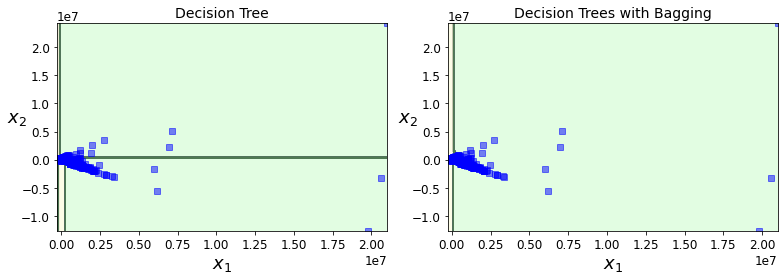

In [34]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_reduced, reduced_X, y, show_title="Decision Tree")
plt.subplot(122)
plot_decision_boundary(bag_clf_reduced, reduced_X, y, show_title="Decision Trees with Bagging")
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# To better observe the effects of integrated learning, use the dataset provided by sklearn for reference
moons_X, moons_y = make_moons(n_samples=500, noise=0.30, random_state=42)
moons_X_train, moons_X_test, moons_y_train, moons_y_test = train_test_split(moons_X, moons_y, random_state=42)

bag_clf.fit(moons_X_train, moons_y_train)
tree_clf.fit(moons_X_train, moons_y_train)

DecisionTreeClassifier(random_state=42)

Saving figure exp_decision_tree_without_and_with_bagging_plot


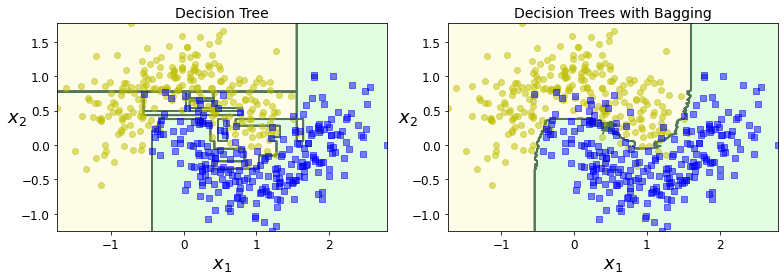

In [36]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf, moons_X, moons_y, show_title="Decision Tree")
plt.subplot(122)
plot_decision_boundary(bag_clf, moons_X, moons_y, show_title="Decision Trees with Bagging")
save_fig("exp_decision_tree_without_and_with_bagging_plot")
plt.show()

##### Out-of-Bag (evaluation)

In [38]:
# oob_score=True indicates that an oob evaluation can be used as an evaluation,
# at which point the cross-validation-like validation set
bag_clf = BaggingClassifier(
    MLPClassifier(random_state=42), n_estimators=100, bootstrap=True,
    max_samples=0.8, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8879310344827587

In [548]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9067796610169492

In [549]:
# Number of categories predicted by the classifier
bag_clf.n_classes_

2

In [550]:
# When the base classifier has predict_proba(),
# the decision function returns the category probability for each training instance
bag_clf.oob_decision_function_

array([[0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 3.51730891e-154],
       ...,
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000]])

##### Sampling Feature

In [350]:
from sklearn.svm import SVC

# Features can be sampled instead of the dataset
bag_clf = BaggingClassifier(
    SVC(probability=True, gamma="scale", random_state=42), n_estimators=50, 
    bootstrap=True, max_samples=0.8, bootstrap_features=True, max_features=0.8,
    oob_score=True, n_jobs=-1, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.7493368700265252

In [351]:
# Category probability for each training instance
bag_clf.oob_decision_function_

array([[0.21294075, 0.78705925],
       [0.32144161, 0.67855839],
       [0.55333047, 0.44666953],
       ...,
       [0.43296516, 0.56703484],
       [0.30680993, 0.69319007],
       [0.247713  , 0.752287  ]])

##### Random Forest

In [352]:
# Approximating the effect of a random forest using integrated learning with put-back sampling
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [355]:
from sklearn.ensemble import RandomForestClassifier

# Use of the stochastic forest classifier model
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [356]:
# Comparison of the similarity of the predicted values of 
# integrated learning with random forest for playback sampling
np.sum(y_pred == y_pred_rf) / len(y_pred)

0.9046610169491526

In [359]:
# Name of the feature
X.columns

Index(['SIO2(WT%)', 'TIO2(WT%)', 'AL2O3(WT%)', 'CR2O3(WT%)', 'FEOT(WT%)',
       'CAO(WT%)', 'MGO(WT%)', 'MNO(WT%)', 'NA2O(WT%)', 'SR(PPB)', 'Y(PPB)',
       'ZR(PPB)', 'NB(PPB)', 'LA(PPB)', 'CE(PPB)', 'PR(PPB)', 'ND(PPB)',
       'SM(PPB)', 'EU(PPB)', 'GD(PPB)', 'DY(PPB)', 'ER(PPB)', 'YB(PPB)',
       'LU(PPB)', 'TH(PPB)'],
      dtype='object')

In [365]:
# Weighting of features
rnd_clf.feature_importances_

array([0.00438949, 0.00206521, 0.00121714, 0.00068749, 0.00150388,
       0.00178637, 0.00139185, 0.00103351, 0.00199074, 0.04205354,
       0.10987124, 0.0694873 , 0.13006902, 0.03913397, 0.03069537,
       0.03632377, 0.03674074, 0.05429722, 0.01785234, 0.08284032,
       0.1402314 , 0.08873374, 0.04845547, 0.0259079 , 0.03124097])

In [361]:
# Showing the weight of each feature
for feature_name, score in zip(list(X.columns), rnd_clf.feature_importances_):
    print(feature_name, ":", score)

SIO2(WT%) : 0.004389494380536179
TIO2(WT%) : 0.0020652136712934186
AL2O3(WT%) : 0.0012171363501104458
CR2O3(WT%) : 0.000687490678313127
FEOT(WT%) : 0.0015038835165836345
CAO(WT%) : 0.001786366753551389
MGO(WT%) : 0.0013918539055258168
MNO(WT%) : 0.0010335054041048688
NA2O(WT%) : 0.0019907406101402378
SR(PPB) : 0.042053544649760924
Y(PPB) : 0.10987124135034955
ZR(PPB) : 0.06948730096812597
NB(PPB) : 0.13006901882147787
LA(PPB) : 0.03913396891702595
CE(PPB) : 0.030695367927998894
PR(PPB) : 0.03632376893757838
ND(PPB) : 0.03674074104480148
SM(PPB) : 0.0542972172765299
EU(PPB) : 0.017852342268801454
GD(PPB) : 0.08284032236904766
DY(PPB) : 0.14023140264808245
ER(PPB) : 0.08873373674522139
YB(PPB) : 0.04845547101072998
LU(PPB) : 0.025907896570442086
TH(PPB) : 0.031240973223866778


In [363]:
columns_name = list(X.columns)

Saving figure rnd_feature_importance


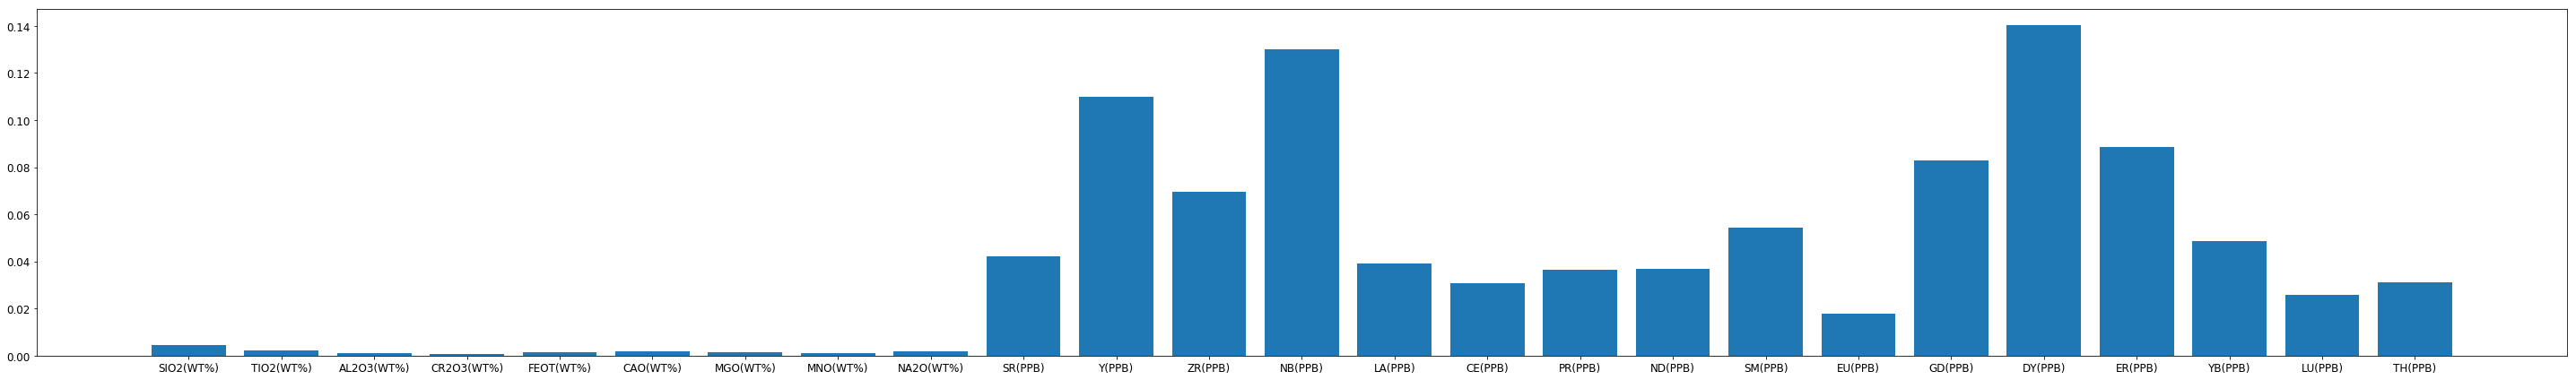

In [440]:
plt.figure(figsize=(40, 6))
# Histogram showing the weights of features predicted by random forests
plt.bar(range(len(columns_name)), rnd_clf.feature_importances_, tick_label=columns_name)
save_fig("rnd_feature_importance")

![2](./learning_images/2.png)

# Adaboost (Adaptive Enhancement)

In [382]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.base import clone

# Using decision trees as a base classifier for AdaBoost
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf_reduced = clone(ada_clf)
# Train ada models using the dataset provided by sklearn and their own downscaled dataset, respectively.
ada_clf.fit(moons_X_train, moons_y_train)
ada_clf_reduced.fit(reduced_X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [554]:
from sklearn.metrics import accuracy_score

# Accuracy of models obtained by training on degraded data
y_pred_ada_reduced = ada_clf_reduced.predict(reduced_X_test)
accuracy_score(y_pred_ada_reduced, y_test)

0.7584745762711864

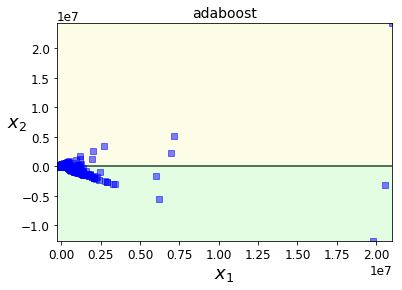

In [389]:
plot_decision_boundary(ada_clf, reduced_X, y, show_title="adaboost")

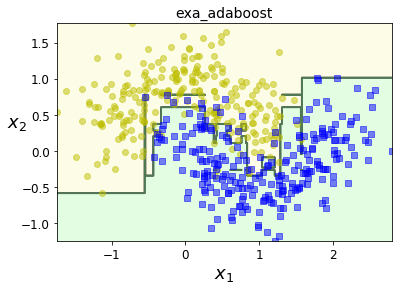

In [388]:
plot_decision_boundary(ada_clf, moons_X, moons_y, show_title="exa_adaboost")

In [424]:
# Accuracy of models trained on un-dimensional datasets
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
accuracy_score(y_pred_ada, y_test)

0.923728813559322

In [426]:
# Characteristic importance of the adaboost model
for feature_name, score in zip(list(X.columns), ada_clf.feature_importances_):
    print(feature_name, ":", score)

SIO2(WT%) : 0.02
TIO2(WT%) : 0.025
AL2O3(WT%) : 0.005
CR2O3(WT%) : 0.0
FEOT(WT%) : 0.0
CAO(WT%) : 0.01
MGO(WT%) : 0.005
MNO(WT%) : 0.035
NA2O(WT%) : 0.015
SR(PPB) : 0.12
Y(PPB) : 0.05
ZR(PPB) : 0.145
NB(PPB) : 0.08
LA(PPB) : 0.05
CE(PPB) : 0.025
PR(PPB) : 0.025
ND(PPB) : 0.05
SM(PPB) : 0.09
EU(PPB) : 0.005
GD(PPB) : 0.01
DY(PPB) : 0.085
ER(PPB) : 0.025
YB(PPB) : 0.045
LU(PPB) : 0.03
TH(PPB) : 0.05


Saving figure ada_feature_importance


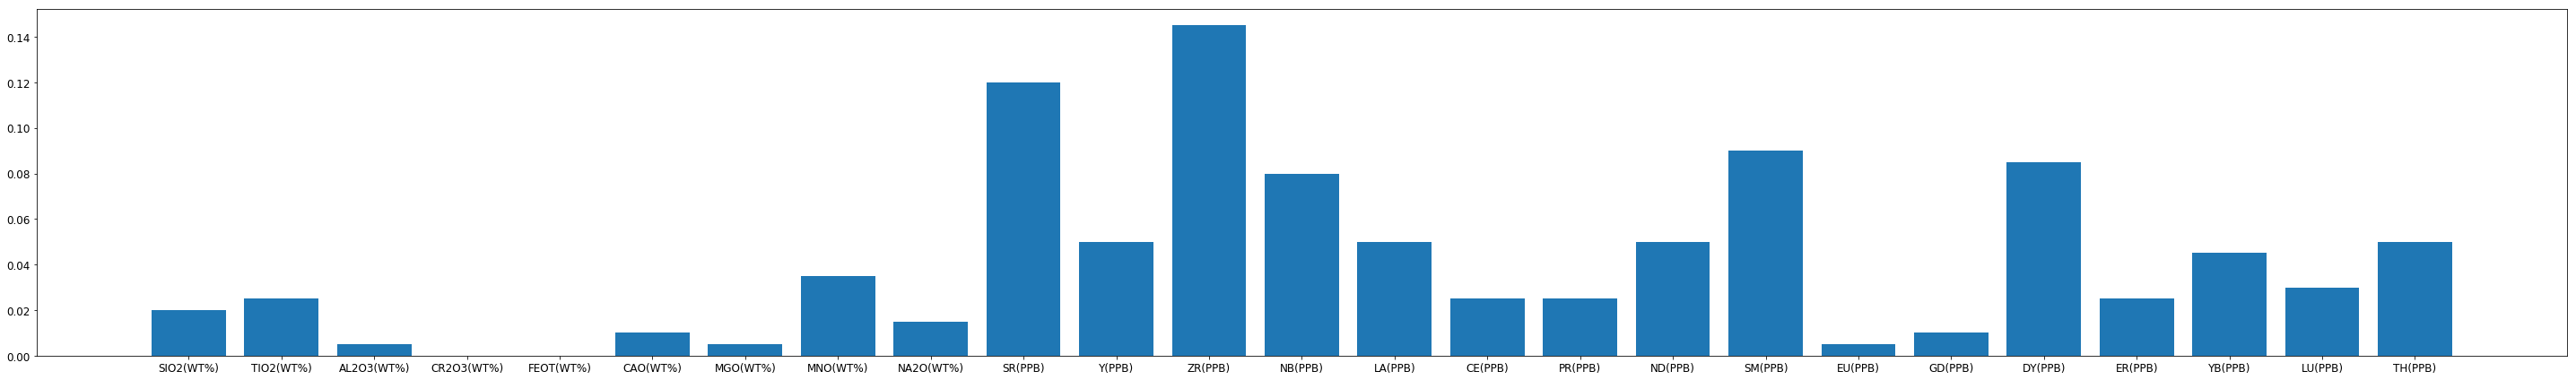

In [439]:
# Histograms present feature weights for Adaboost predictions
plt.figure(figsize=(40, 6))
plt.bar(range(len(columns_name)), ada_clf.feature_importances_, tick_label=columns_name)
save_fig("ada_feature_importance")

In [415]:
# Using svm as Adaboost's base classifier
ada_clf_svm = AdaBoostClassifier(
    SVC(probability=True, gamma="scale", random_state=42), n_estimators=5, algorithm="SAMME.R",
        learning_rate=0.5, random_state=42)
ada_clf_svm_reduced =clone(ada_clf_svm)
ada_clf_svm.fit(X_train, y_train)
ada_clf_svm_reduced.fit(reduced_X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=3, gamma='scale', kernel='rbf',
                                      max_iter=-1, probability=True,
                                      random_state=42, shrinking=True,
                                      tol=0.001, verbose=False),
                   learning_rate=0.5, n_estimators=5, random_state=42)

In [416]:
y_pred_svm_ada = ada_clf_svm.predict(X_test)
accuracy_score(y_pred_svm_ada, y_test)

0.6927966101694916

![3](./learning_images/3.png)

# GradientBoosting (gradient lift)

In [506]:
from sklearn.ensemble import GradientBoostingClassifier

# GradientBoosting is tree model-based integrated learning
gbct_clf1 = GradientBoostingClassifier(loss="deviance", learning_rate=0.5, n_estimators=100, random_state=42)
gbct_clf1.fit(X_train, y_train)
y_pred_gbct1 = gbct_clf1.predict(X_test)

In [507]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred_gbct1, y_test)

0.961864406779661

In [508]:
# Characteristic Importance of the GradientBoosting Model
for feature_name, score in zip(list(X.columns), gbct_clf1.feature_importances_):
    print(feature_name, ":", score)

SIO2(WT%) : 0.0069925270235988175
TIO2(WT%) : 0.0027911739808562765
AL2O3(WT%) : 0.00166548645540833
CR2O3(WT%) : 0.0003143765510895291
FEOT(WT%) : 0.0014251261831526765
CAO(WT%) : 0.008900305857705572
MGO(WT%) : 0.00045419391957491413
MNO(WT%) : 0.0015796474161836555
NA2O(WT%) : 0.00021689596760470344
SR(PPB) : 0.06578898461013688
Y(PPB) : 0.04461039469531582
ZR(PPB) : 0.08354646719930384
NB(PPB) : 0.21704415048077208
LA(PPB) : 0.012047396679390103
CE(PPB) : 0.02392243392772857
PR(PPB) : 0.012779345618199836
ND(PPB) : 0.006270503762446822
SM(PPB) : 0.017263939109971916
EU(PPB) : 0.003074858557746943
GD(PPB) : 0.04585806503429955
DY(PPB) : 0.3310097136441577
ER(PPB) : 0.04398566586173986
YB(PPB) : 0.014826644083583343
LU(PPB) : 0.026003683618361972
TH(PPB) : 0.027628019761670366


Saving figure gbct_feature_importance


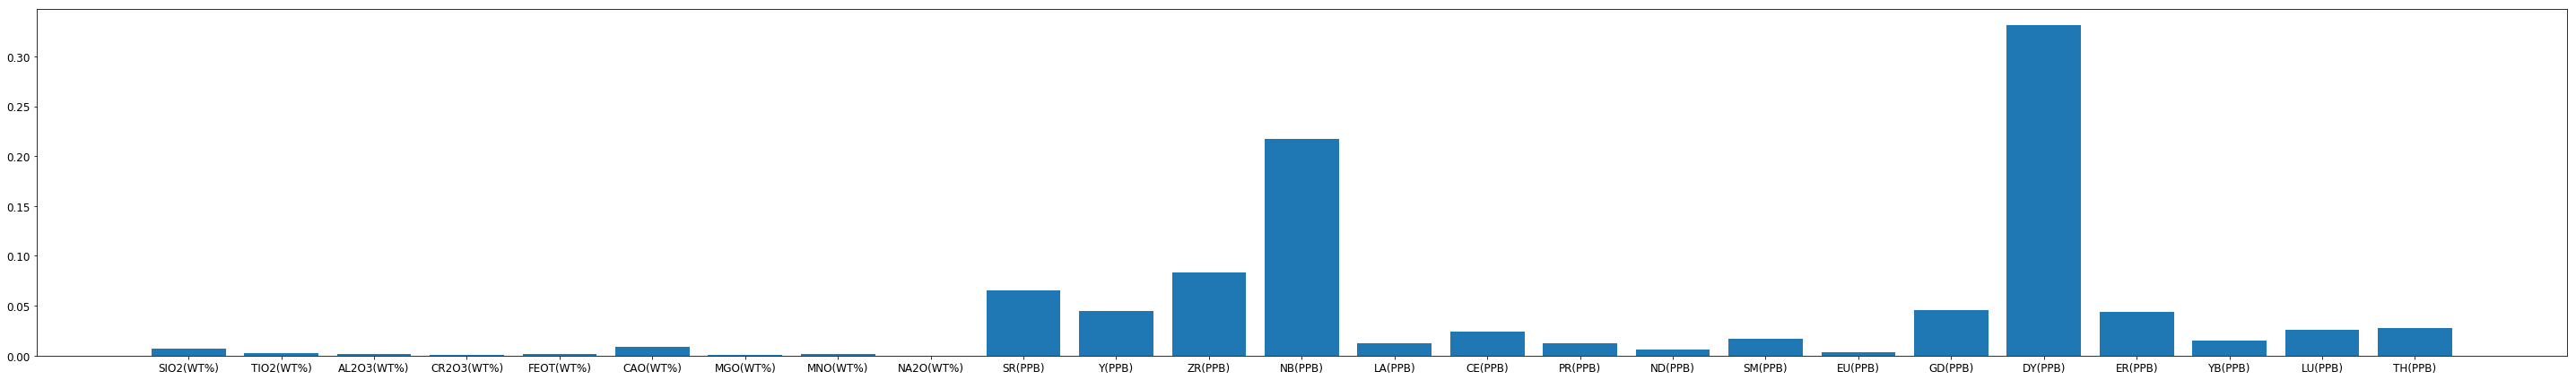

In [445]:
# Histograms present feature weights for GradientBoosting predictions
plt.figure(figsize=(40, 6))
plt.bar(range(len(columns_name)), gbct_clf1.feature_importances_, tick_label=columns_name)
save_fig("gbct_feature_importance")

In [455]:
from sklearn.metrics import accuracy_score

# warm_start=True allows GBCT to keep existing trees and allows incremental training
gbct_clf2 = GradientBoostingClassifier(max_depth=3, warm_start=True, random_state=42)
accuracy = []
for n_estimators in range(1, 120):
    gbct_clf2.n_estimators = n_estimators
    gbct_clf2.fit(X_train, y_train)
    y_pred_gbct2 = gbct_clf2.predict(X_val)
    accuracy.append(accuracy_score(y_pred_gbct2, y_val))

Saving figure gbct_warm_start


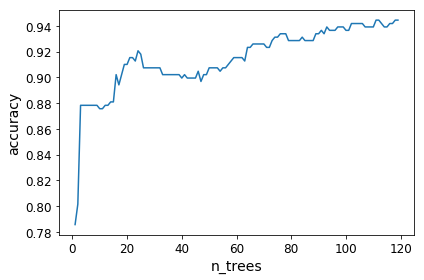

In [457]:
plt.plot(range(1, 120), accuracy)
plt.xlabel("n_trees")
plt.ylabel("accuracy")
save_fig("gbct_warm_start")

In [459]:
# Find the number of trees that give the highest accuracy
best_tree_number = np.argmax(accuracy) + 1
gbct_clf3 = GradientBoostingClassifier(max_depth=3, n_estimators=best_tree_number, random_state=42)
gbct_clf3.fit(X_train, y_train)
y_pred_gbct3 = gbct_clf3.predict(X_test)
accuracy_score(y_pred_gbct3, y_test)

0.9597457627118644

In [460]:
# Training models with datasets provided by sklearn to visualize the process
gbct_clf4 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
gbct_clf4.fit(moons_X_train, moons_y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

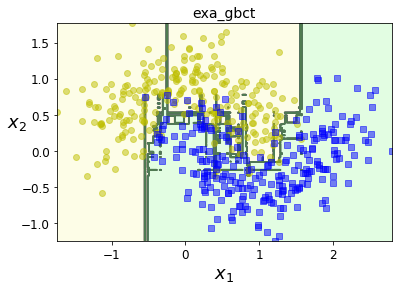

In [461]:
plot_decision_boundary(gbct_clf4, moons_X, moons_y, show_title="exa_gbct")

##### XGBoost

In [503]:
# Use pip3 install xgboost in docs or terminal.
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed")
    xgboost = None

In [504]:
if xgboost:
    xgb_clf = xgboost.XGBClassifier(max_depth=4, learning_rate=0.1,
                                    n_estimators=100, random_state=42)
    xgb_clf.fit(X_train, y_train)
    y_pred_xgb = xgb_clf.predict(X_test)
    accuracy = accuracy_score(y_pred_xgb, y_test)
    print(accuracy)

0.9555084745762712


In [494]:
# Characteristic importance of the xgboost model
for feature_name, score in zip(list(X.columns), xgb_clf.feature_importances_):
    print(feature_name, ":", score)

SIO2(WT%) : 0.017526321
TIO2(WT%) : 0.008290754
AL2O3(WT%) : 0.008226149
CR2O3(WT%) : 0.0067688655
FEOT(WT%) : 0.0057260483
CAO(WT%) : 0.011506431
MGO(WT%) : 0.0067142393
MNO(WT%) : 0.012201387
NA2O(WT%) : 0.006672352
SR(PPB) : 0.030502705
Y(PPB) : 0.04569668
ZR(PPB) : 0.03529168
NB(PPB) : 0.12215777
LA(PPB) : 0.021509757
CE(PPB) : 0.020506568
PR(PPB) : 0.046140604
ND(PPB) : 0.034415357
SM(PPB) : 0.03424005
EU(PPB) : 0.015329148
GD(PPB) : 0.091134645
DY(PPB) : 0.27982146
ER(PPB) : 0.06824005
YB(PPB) : 0.01799907
LU(PPB) : 0.026435392
TH(PPB) : 0.026946569


Saving figure xgb_feature_importance


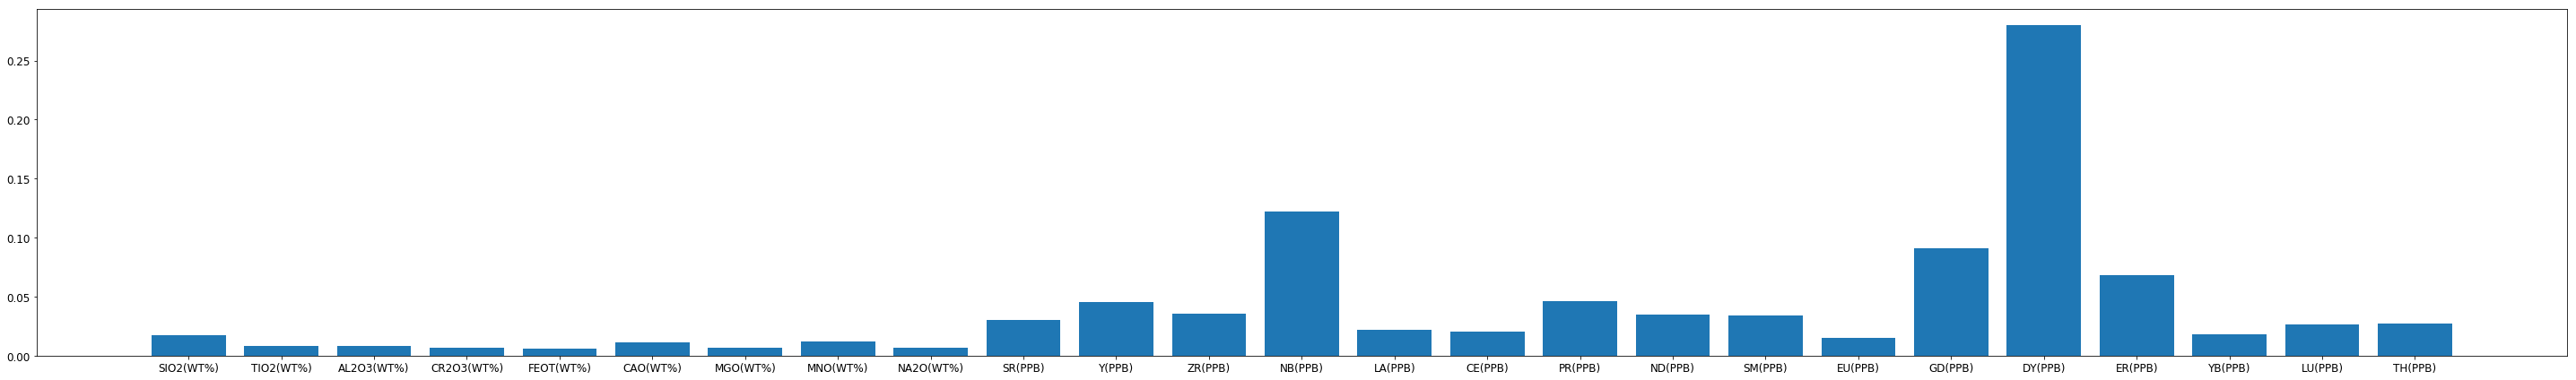

In [492]:
# Histograms present feature weights for XGBoost predictions
plt.figure(figsize=(40, 6))
plt.bar(range(len(columns_name)), xgb_clf.feature_importances_, tick_label=columns_name)
save_fig("xgb_feature_importance")

Saving figure xgb_feature_importance_fscore


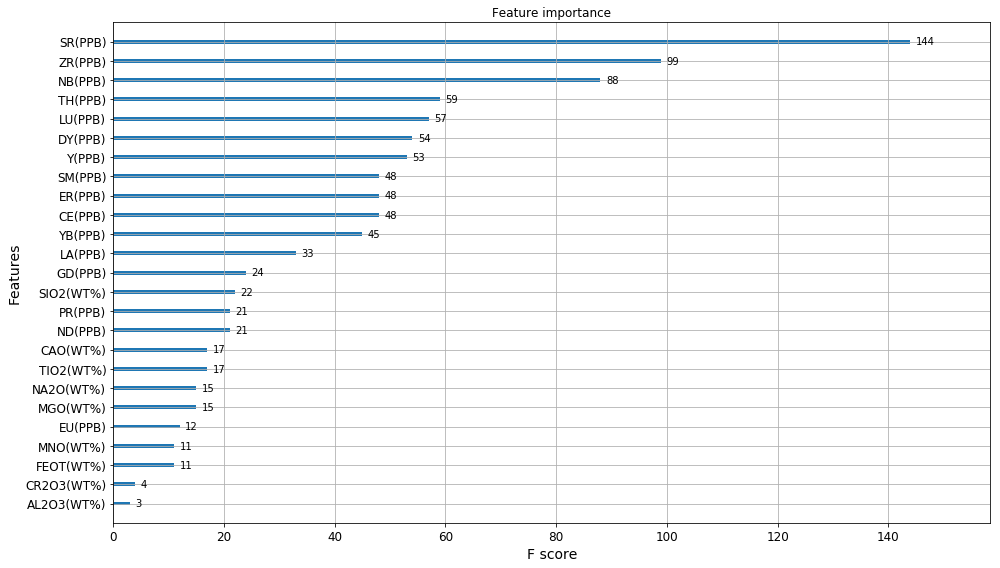

In [493]:
# Feature importance map ranked by importance
plt.rcParams["figure.figsize"] = (14, 8)
xgboost.plot_importance(xgb_clf)
save_fig("xgb_feature_importance_fscore")

In [505]:
# Testing XGBC Runtime
%timeit xgboost.XGBClassifier().fit(X_train, y_train) if xgboost is not None else None

206 ms ± 60.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [499]:
# Testing GBCT Runtime
%timeit GradientBoostingClassifier().fit(X_train, y_train)

353 ms ± 28.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


![4](./learning_images/4.png)

# Stacking Ensemble

In [429]:
X_val_predictions = np.empty((len(X_val), len(estimators)), dtype=np.float32)

# Predicted classification categories for each classifier for all instance data points in the validation set
for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)

In [430]:
X_val_predictions

array([[ 1.,  1.,  1.,  1.,  1.],
       [-1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1., -1.],
       ...,
       [ 1.,  1.,  1.,  1.,  1.],
       [-1.,  1., -1.,  1., -1.],
       [-1., -1., -1., -1., -1.]], dtype=float32)

In [433]:
# With random forest as blender, optional MLP, SVM and other classifiers
rnd_forest_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)
rnd_forest_blender.fit(X_val_predictions, y_val)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [435]:
# Random Forest's out-of-bag score
rnd_forest_blender.oob_score_

0.9708994708994709

In [436]:
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype=np.float32)

# Predicted classification categories per classifier for all training instances in the test set
for index, estimator in enumerate(estimators):
    X_test_predictions[:, index] = estimator.predict(X_test)

In [437]:
y_pred = rnd_forest_blender.predict(X_test_predictions)

In [438]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9427966101694916